In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3prep-0505StandardScalar1D/'
FileBaseName = '3prep-0505StandardScalar1D'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
import sklearn.preprocessing as prep
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3prep-0505StandardScalar1D/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3prep-0505StandardScalar1D/


計測データを模倣したデータ
$$
y(t)=\sum_{\nu=1}^{2}
\exp\left(-\frac{t}{\tau_\nu}\right)
\left(
  a_\nu
  \cos 2\pi{}f_\nu t
  +
  b_\nu
  \sin 2\pi{}f_\nu t
\right)
$$
$$
\begin{array}{|c|c|c|c|}
  \hline
  f_\nu\,\,({\rm THz})& \tau_\nu\,\, ({\rm ps}) & a_\nu\,\, ({\rm V})& b_\nu\,\, ({\rm V})\\
  \hline
  2.91 & 4.35 & -9.35\times10^{-7}  & -0.493\times10^{-7} \\
  2.07 & 1.96 & +0.218\times10^{-7} & +3.53\times10^{-7} \\
  \hline
\end{array}
$$
* 時間:$t=[0.0,8.0\times10^{-12}]$ sec $= [0.0,8.0]$ ps

In [4]:
############################################
M = 400
#
############################################
# time (ps) axis
tt = np.linspace( 0.0, +8.0, endpoint=False, num=M )
#
tt_sec = tt * 1.0E-12
#
dt = (np.amax(tt) - np.amin(tt))/(M-1.0)
print('dt   =', dt, ' ps' )
#
############################################
# frequency (THz) axis
df = 1.0 / (M*dt)
print('df   =', df, ' THz' )
#
fmax = 1.0 /(2.0 * dt)
print('fmax = ', fmax, ' THz' )
#
ff = np.linspace(0.0, fmax, endpoint=True, num=int(M/2+1) )
#
ff_Hz = ff * 1.0E12
#
ff_k = ff.size
#
############################################
# 計測データを模倣したデータ
##################
# モードパラメータ
# Mode 1
f_1   = 2.91      # THz
w_1   = 2.0 * np.pi * f_1
tau_1 = 4.35      # ps
a_1   = -9.35E-7  # V
b_1   = -0.493E-7 # V
#
# Mode 2
f_2   = 2.07      # THz
w_2   = 2.0 * np.pi * f_2
tau_2 = 1.96      # ps
a_2   = +0.218E-7 # V
b_2   = +3.53E-7  # V
#
##################
# 真値データ
y_true = np.exp( -tt/tau_1 ) * \
         (a_1 * np.cos( w_1 * tt ) + \
          b_1 * np.cos( w_1 * tt ) ) + \
         + np.exp( -tt/tau_2 ) * \
         (a_2 * np.cos( w_2 * tt ) + \
          b_2 * np.cos( w_2 * tt ) )
############################################
# 重畳する正規ノイズの標準偏差
sigma_noise = 2.0E-7
y_noise = rd.randn(M).reshape(M,)
y_noise = y_noise - np.mean( y_noise )
y_noise = y_noise / np.std( y_noise )
#
y_wn = y_true + sigma_noise * y_noise
#

dt   = 0.02  ps
df   = 0.125  THz
fmax =  25.0  THz


時系列データを描くグラフ関数

In [5]:
############################################
def Grf_TimeSeries( tt, y_sets ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,6))
  #
  fig.subplots_adjust(left=0.19, right=0.98, top=0.95, bottom=0.1,wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  xmin = np.amin( tt )
  xmax = np.amax( tt )
  #
  ax1.set_xlim( xmin, xmax )
  ax1.set_xlabel( r'time $t$ (ps)' )
  #
  ax1.set_ylabel( 'Intensity' )
  #
  ymax = 0.0
  ymin = 0.0
  #
  for y_set in y_sets:
    #
    # y_set [ y_data, label, color, width, style ]
    #
    ymax_ = np.amax(y_set[0])
    if ymax_ > ymax:
      ymax = ymax_
    #
    ymin_ = np.amin(y_set[0])
    if ymin_ < ymin:
      ymin = ymin_
    #
    ax1.plot( tt, y_set[0], label=y_set[1], color=y_set[2], linewidth=y_set[3], linestyle=y_set[4] )
  #
  y_center = (ymax + ymin)/2.0
  y_width  = (ymax - ymin)/2.0
  #
  ax1.set_ylim( y_center - 1.2 * y_width, y_center + 1.2 * y_width )
  #
  ax1.legend(loc='upper right')
  #
  plt.show()
  #
  return fig

元データのグラフ

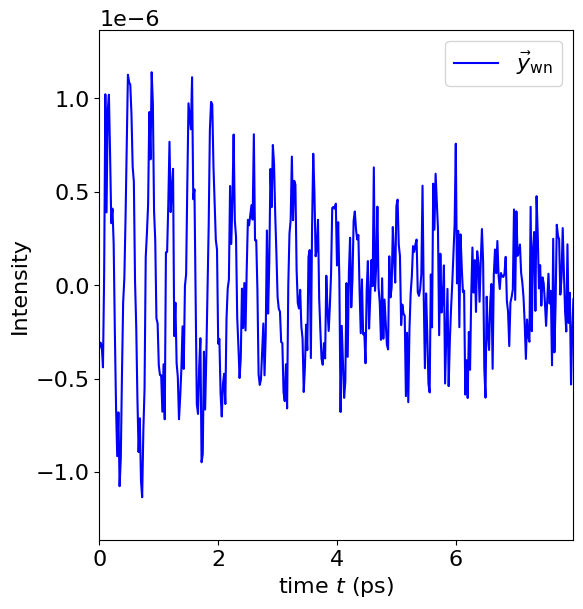

In [6]:
############################################
y_true_set = [ y_true, r'$\vec{y}_{\rm true}$', 'red',  3, 'solid' ]
y_wn_set   = [ y_wn,   r'$\vec{y}_{\rm wn}$',   'blue', 1.5, 'solid' ]
#
# y_sets = [ y_true_set, y_wn_set ]
y_sets = [ y_wn_set ]
#
fig = Grf_TimeSeries( tt, y_sets )
#
fig.savefig( FilePath + FileBaseName + '-RawData.pdf' )

データの標準化
* sklearn.preprocessing.StandardScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

データに対し、以下の前処理を行う
1. 平均値$\mu$を差し引き
2. 単位分散にスケーリング

して、特徴を標準化する。サンプル$x$の標準化は以下の式で計算される。
$$
 z = \frac{x - \mu}{s}
$$
* $\mu$: サンプルの平均値。但し with_mean=False の場合は 0
* $s$学習サンプルの標準偏差。但しwith_std=False の場合は 1

$\bullet$ 多次元配列 (n_samples, n_features) を想定しているため、(n_samples)] である1次元データに適用する場合は、reshapeしておく必要がある。

In [7]:
############################################
scaler = prep.StandardScaler()
#
print( y_wn.shape )
print( y_wn.reshape([-1,1]).shape )
#
scaler.fit( y_wn.reshape([-1,1]) )
#
# ノイズが重畳したデータ
y_wn_ss = scaler.transform( y_wn.reshape([-1,1]) )
print( y_wn_ss.shape )
#
y_wn_ss = y_wn_ss.reshape([-1,])
print( y_wn_ss.shape )
print( np.mean( y_wn_ss ) )
print( np.std( y_wn_ss ) )
#
# 真値データ
y_true_ss = scaler.transform( y_true.reshape([-1,1]) )
y_true_ss = y_true_ss.reshape([-1,])
#
print( np.mean( y_true_ss ) )
print( np.std( y_true_ss ) )

(400,)
(400, 1)
(400, 1)
(400,)
-3.552713678800501e-17
1.0
-4.4408920985006264e-17
0.8815013649971442


標準化したデータのグラフ描画

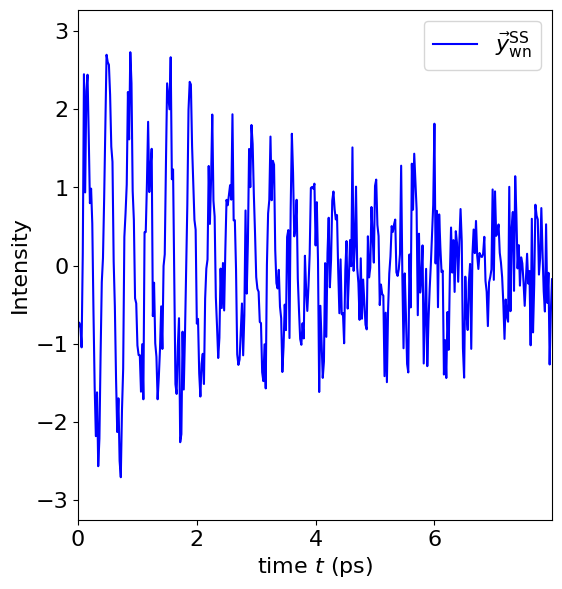

In [8]:
############################################
y_true_ss_set = [ y_true_ss, r'$\vec{y}_{\rm true}^{\rm SS}$', 'red',  3, 'solid' ]
y_wn_ss_set   = [ y_wn_ss,   r'$\vec{y}_{\rm wn}^{\rm SS}$',   'blue', 1.5, 'solid' ]
#
# y_ss_sets = [ y_true_ss_set, y_wn_ss_set ]
y_ss_sets = [ y_wn_ss_set ]
#
fig = Grf_TimeSeries( tt, y_ss_sets )
#
fig.savefig( FilePath + FileBaseName + '-StandardScalerData.pdf' )

標準化されたデータを元に戻す

In [9]:
############################################
# 標準化されたデータ
# y_wn_ss, y_true_ss
#
# 標準化されたデータを元に戻す
y_wn_inv = scaler.inverse_transform( y_wn_ss.reshape([-1,1]) )
y_wn_inv = y_wn_inv.reshape([-1,])
#
y_true_inv = scaler.inverse_transform( y_true_ss.reshape([-1,1]) )
y_true_inv = y_true_inv.reshape([-1,])
#

標準化データから戻したデータのグラフ描画

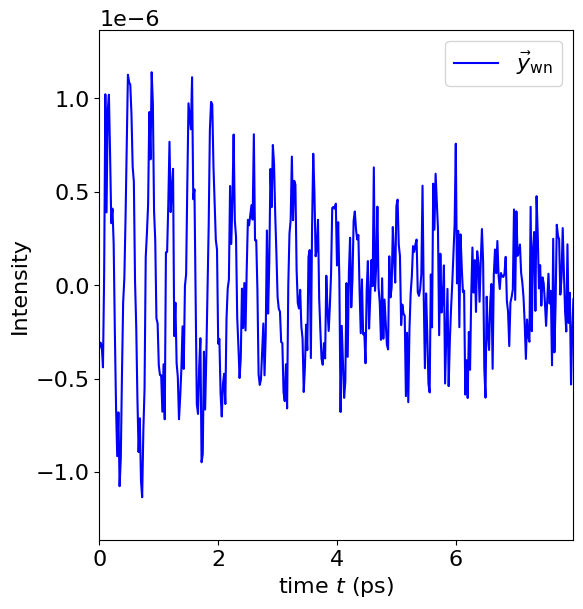

In [10]:
############################################
y_true_inv_set = [ y_true_inv, r'$\vec{y}_{\rm true}$', 'red',  3, 'solid' ]
y_wn_inv_set   = [ y_wn_inv,   r'$\vec{y}_{\rm wn}$',   'blue', 1.5, 'solid' ]
#
# y_inv_sets = [ y_true_inv_set, y_wn_inv_set ]
y_inv_sets = [ y_wn_inv_set ]
#
fig = Grf_TimeSeries( tt, y_inv_sets )
#
fig.savefig( FilePath + FileBaseName + '-InvTransformData.pdf' )